<h1><center>TDA and Statistics using Gudhi Python Library </center></h1>

<h1><center>Part 4 - Classification using Persistence Homology </center></h1>


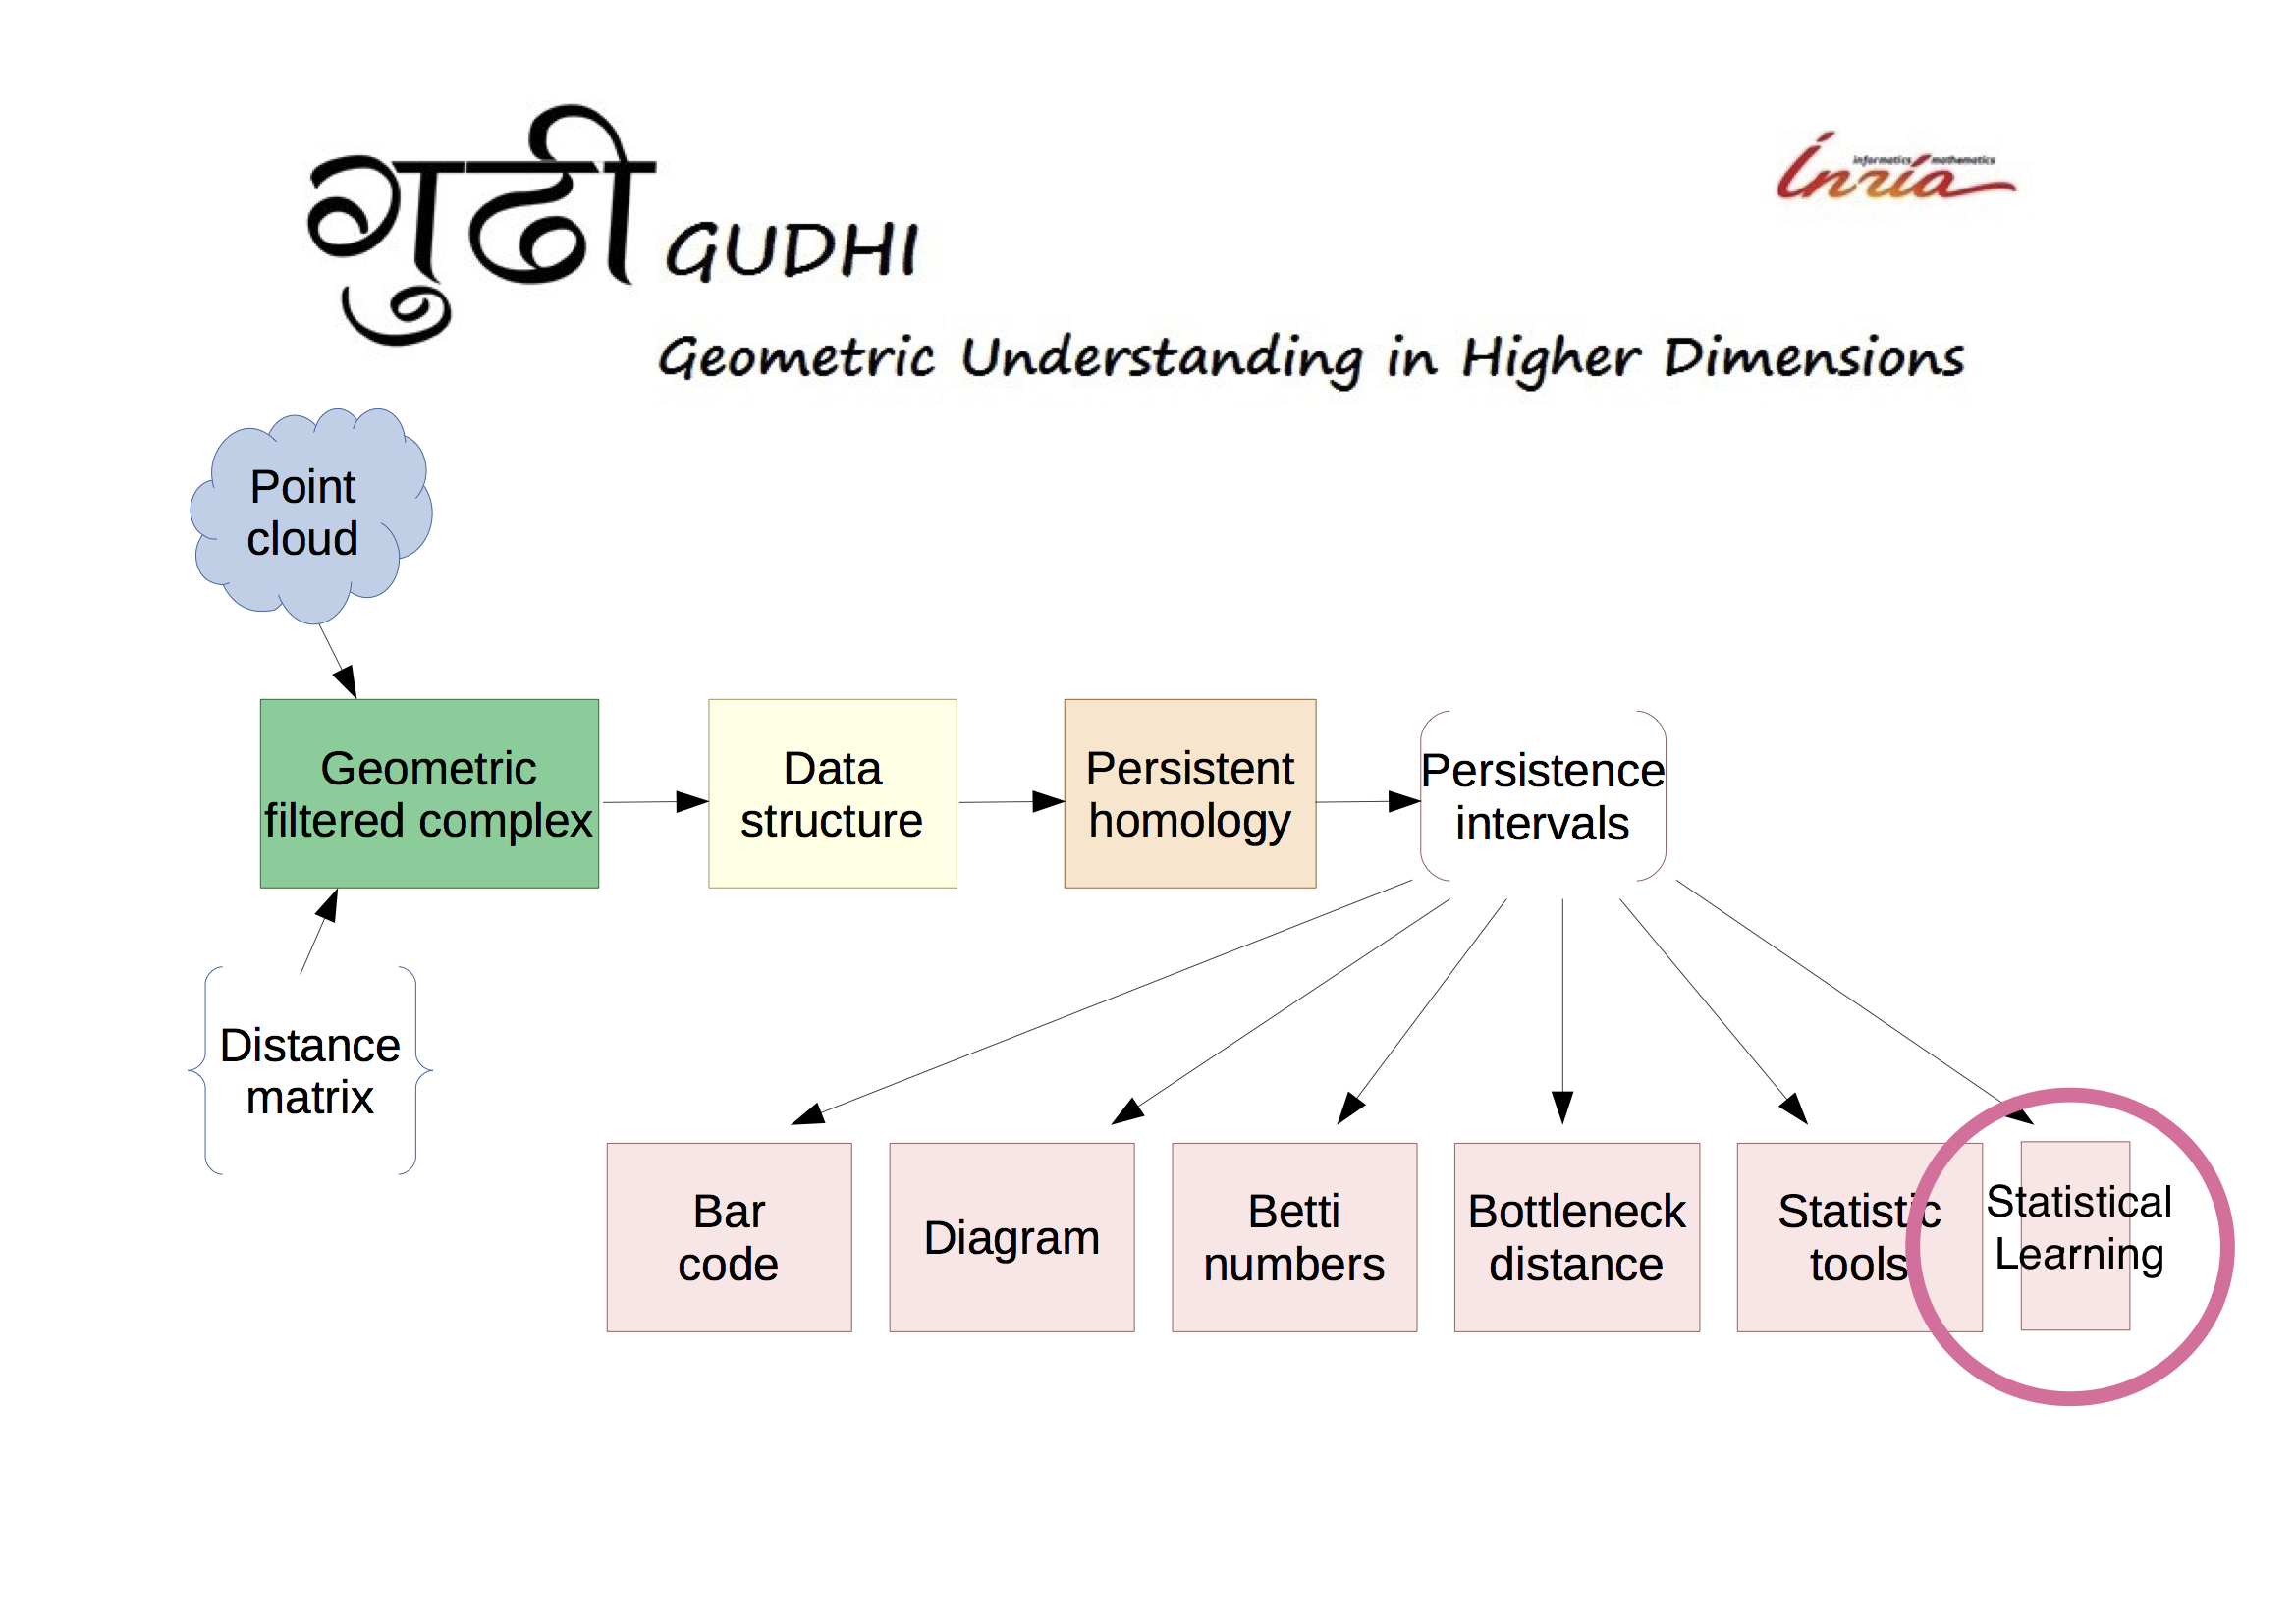

In [1]:
from IPython.display import Image
Image("SlidesGudhi/GeneralPipeLine_ML.png",width= 1000)

In [ ]:
import pandas as pd
import numpy as np
import pickle as pickle
import gudhi as gd
from persistence_graphical_tools_Bertrand import *
%matplotlib inline

## Load the data 

In [ ]:
f = open("data_acc","rb")
data = pickle.load(f)
f.close()
data_A = data[0]
data_B = data[1] 
data_C = data[2]
label = data[3]
print(label)
data_A_sample = data_A[0]

### Persistence Landscapes 

The persistence landscape has been introduced [Bubenik etal. JMLR 2015](http://www.jmlr.org/papers/volume16/bubenik15a/bubenik15a.pdf) as an alternative to persistence diagrams. This approach aims at representing topological features in an Hilbert space, for which statistical learning methods can be directly applied. 

Note that many other alternatives have been proposed: silhouettes, persistence images, cumulative peristence intensity function etc. Coming soon in Gudhi...

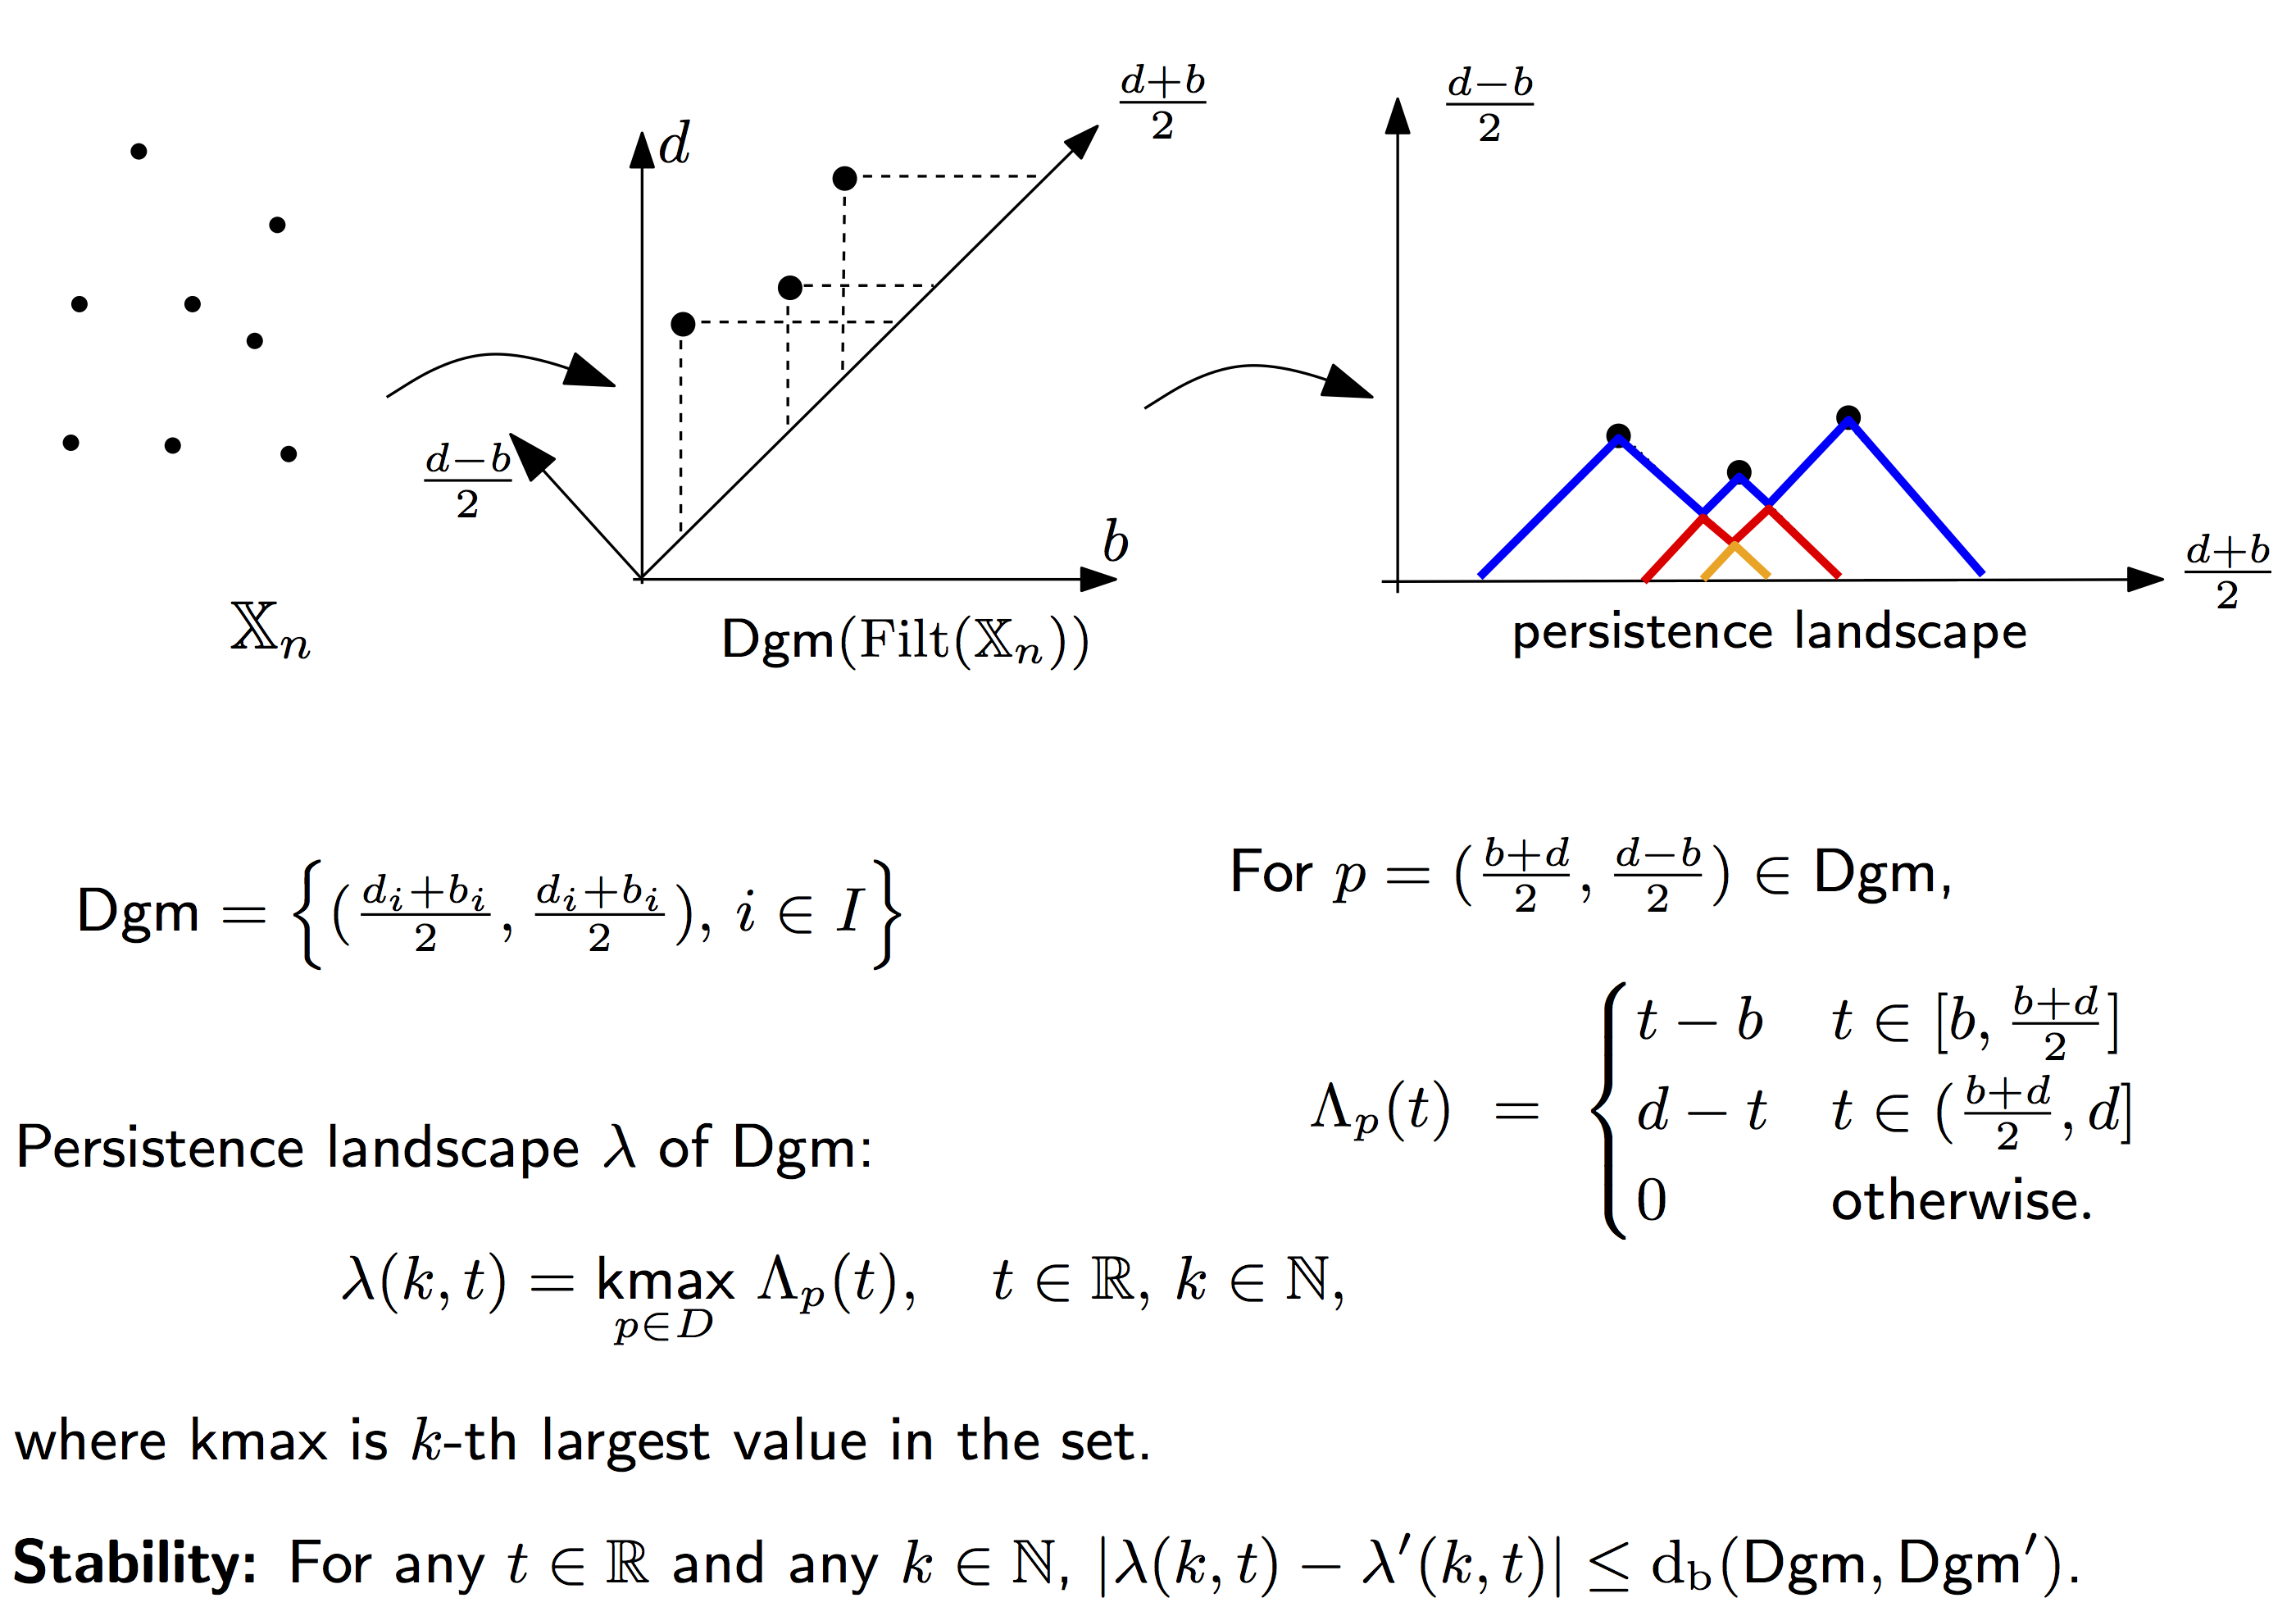

In [3]:
Image("SlidesGudhi/Landscapes.png",width = 800)

We now compute and plot the pesistence landscapes for data_A_sample. 

First we compute the alpha complexe landscapes:

In [ ]:
alpha_complex_sample = gd.AlphaComplex(points = data_A_sample)
simplex_tree_sample = alpha_complex_sample.create_simplex_tree(max_alpha_square=0.3) 

then the persistence:

In [ ]:
diag_Alpha = simplex_tree_sample.persistence()
gd.plot_persistence_diagram(diag_Alpha)

and finally we compute the landscapes with the <code>landscapes_approx()</code> function:

In [ ]:
nbld = 3 # number of Landscapes 
resolution = 1000
length_max = 0.3
ld_dim = 1 # landscape dim

L = landscapes_approx(simplex_tree_sample.persistence_intervals_in_dimension(ld_dim),0,length_max,resolution,nbld)

we can plot the landcapes (3 first landcapes pour homology 1 in this example):

In [ ]:
plt.plot(np.linspace(0,length_max * 1.1, num=resolution),L[0:nbld,:].transpose())

<p style="border:2px; border-style:solid; padding: 0.5em;border-color:red"> 
<b> Exercice. </b> Compute the persistence landscapes for all the acceleration samples (for A, B and C)
 </p>

### Classification to predict the walker

We train a standard random forest classifier on the data to predict the Walker from the landscapes generated by the acceleration.

We split the samples into a train dataset and a test dataset and we evaluate the generalisation error for this classification problem (another option is to evaluate the out of bag error).

We use the [scikit-learn](http://scikit-learn.org/) library.

The procedure is repeated several times.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
for i in range(20):
    Feature_land_mat_train, Feature_land_mat_test, label_train, label_test = train_test_split(Feature_land_mat,
                                                                                              label,
                                                                                              test_size=0.2)
    RF = RandomForestClassifier()
    RF.fit(Feature_land_mat_train, label_train)
    print(np.mean(RF.predict(Feature_land_mat_test) == label_test) )


<p style="border:2px; border-style:solid; padding: 0.5em;border-color:red"> 
<b> Exercice. </b> Compute and discuss the importances of the (landcape) features for one fitted forest.
 </p>